

# Task 1
Provide a definition for the concept of a conjugate prior given the Bayesian learning model. What is the conjugate prior for the univariate linear regression y∼(wx,σ2) with a fixed σ?

 ## ANSWER

- A. Definition of Conjugate prior:

Under the Bayesian probability theory, it allows probability to represent subjective belief or additional observations, which could ﬁx the data and instead assumes possible values for parameters w. So, based on the parameters w and a series of observations data D=(Y,X)= {(yi,xi),i=1..N}, if the posterior distributions p(w|Y,X) are in the same family as the prior probability distribution p(w), the prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function.

- B. Conjugate prior based on the the univariate linear regression y∼(wx,σ2) with a fixed σ?
There are two situations we need to consider:a. uninformed prior;b.given prior
As we could know, the prior follow the normal distribution,
if the prior w is given, it will follow 
$$
w \sim \cal N(w^*,\sigma^*)
$$

if the prior w is not given,  $\sigma^*\to \infty$, 
based on the OLS, RSS(w)→min,it will follow
$$
w\sim {\cal N}\left(\frac{\sum_i x_i y_i}{\sum_i x_i^2},\frac{\sigma}{\sqrt{\sum_i x_i^2}}\right)
$$










# Task 2

Which prior in the Bayesian linear regression framework leads to: a) Ridge regression, b) Lasso regression?

## ANSEWER

- The Ridge regression: the prior is $\hat w = argmin_w[RSS(w)+\lambda \|w\|_2^2]$
- The Lasso regression: the prior is $\hat w = argmin_w[RSS(w)+\lambda \|w\|_1]$



# Task 3 (10% credit). 
Answer some questions about the properties of Lasso/Ridge:

a) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

b) Which of the Lasso and Ridge regressions often use to completely eliminate coefficients for some of the regressors?

c) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

d) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

## ANSWER
a) Ridge regressions possess an analytic solution in the closed form, which is represented below,
$$
\hat{w}=(X^T X+\lambda I)^{-1}X^T Y
$$
b)Lasso Regression

c) Ridge Regression

d) validation dataset

# Task 4 (15% credit). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=1$ and the prior $w\sim {\cal N}(5,1)$. Compute the posterior distribution after an observation $y=12,x=2$. After all, what is the probability of having $w<5$?

## ANSWER

As we could know, $\sigma = 1$, $w^*=5$, $\sigma^*=1$, new $x_i=2$, new $y_i=12$,

Based on what represented below, 

$$
p(w|Y, X) \sim {\cal N}\left(\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)},
\frac{1}{\sqrt{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}\right)
$$


In [104]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.io.data as web
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import random
from scipy import stats
from scipy.stats import norm
from pandas.stats.api import ols
import pylab
from sklearn import linear_model

s=1; w1=5; s1=1; x_i=2; y_i=12;
a=1/s**2
b=1/s1**2

w2=(a*sum(x_i*y_i)+b*w1)/(a*sum(x_i**2)+b)
s2=(a*sum(x_i**2)+b)**(-1/2)
print('w ~ N({0},{1})'.format(w2,s2))
prob=norm.cdf(5,loc=w2,scale=s2)

print('The probability of having w<5 is {0}'.format(prob))

Populating the interactive namespace from numpy and matplotlib
w ~ N(5.8,0.4472135954999579)
The probability of having w<5 is 0.03681913506015136


`%matplotlib` prevents importing * from pylab and numpy


# Task 5 (20% credit). 
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

## ANSWER

In [207]:
import pandas as pd
import numpy as np
from pandas.stats.api import ols

data_train=pd.read_csv("Homework1_training.csv")
data_train.head()


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,40
0,0,97,84.993531,24.300457,30.863846,-50.066189,18.879159,167.926580,93.749684,177.561130,...,42,65,36,34,60,23,44,61,65,65.205997
1,1,41,35.636548,6.302279,14.119293,-22.658359,6.912916,70.939474,41.480651,76.031059,...,73,46,46,0,53,62,22,72,8,49.676983
2,2,31,26.822800,3.088319,11.129194,-17.764103,4.776086,53.620348,32.146895,57.900690,...,18,28,44,75,16,3,71,45,18,11.557130
3,3,32,27.704175,3.409715,11.428204,-18.253529,4.989769,55.352260,33.080271,59.713727,...,99,2,21,95,31,23,97,12,47,14.632636
4,4,70,61.196414,15.622764,22.790580,-36.851699,13.109720,121.164939,68.548543,128.609132,...,72,86,99,6,90,39,86,61,84,54.682430


In [208]:
data_test=pd.read_csv("Homework1_test.csv")
data_test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,40
0,0,26,22.415927,1.481339,9.634145,-15.316976,3.707672,44.960785,27.480018,48.835505,...,84,28,39,26,85,71,83,26,43,17.023843
1,1,45,39.162046,7.587863,15.315333,-24.616061,7.767647,77.867124,45.214154,83.283207,...,93,66,5,3,46,41,22,28,7,34.872741
2,2,91,79.705283,22.372081,29.069787,-47.129635,17.597062,157.535104,88.149430,166.682908,...,27,47,22,7,62,1,82,53,52,64.479635
3,3,0,-0.499815,-6.874958,1.859888,-2.591912,-1.848084,-0.068943,3.212252,1.696543,...,17,90,67,76,59,17,6,69,79,4.264842
4,4,47,40.924796,8.230655,15.913352,-25.594912,8.195013,81.330949,47.080905,86.909281,...,66,98,85,45,16,81,37,44,20,51.037942


In [209]:
y_train = data_train.iloc[:,-1]
x_train = data_train.iloc[:,0:-1]
y_test = data_test.iloc[:,-1]
x_test = data_test.iloc[:,0:-1]

result=ols(y=y_train,x=x_train)
result.summary_as_matrix.T

,beta,p-value,std err,t-stat
Unnamed: 0,5.075467e-01,NaN,inf,0
0,2.279540e+10,NaN,NaN,NaN
1,1.987204e+10,NaN,inf,0
2,-2.768465e+10,NaN,inf,-0
3,3.857582e+10,NaN,inf,0
4,-4.256992e+10,NaN,inf,-0
5,5.641140e+10,NaN,NaN,NaN
6,4.423962e+10,NaN,NaN,NaN
7,5.166417e+10,NaN,inf,0
8,-9.274644e+10,NaN,inf,-0


In [210]:
# In the sample. (Only use training set)
result=ols(y=y_train,x=x_train)
#print(result.summary_as_matrix.T)
R_2_IS=result.r2  
OLS_coef=result.beta

#Out of sample 
a=np.array(x_test)  #makes sure conver pd data to np array
b=np.array(result.beta) #makes sure conver pd data to np array
print('OLS regression coefficients={0}'.format(b))
c=np.sum(a*b[0:-1],axis=1)+b[-1] #b is estimated coefficients, a is prediction data, b[-1] is intercept. This is for predicted y
error=y_test-c # y_predict is real value, c is the value we guessed
R_2_OS=1-error.var()/y_test.var() # this is out of sample R2
print("The R-squared we found for in-sample (IS) OLS is: {0}".format(R_2_IS))
print("The R-squared we found for out-of-sample (OS) OLS is: {0}".format(R_2_OS))



OLS regression coefficients=[  5.07546723e-01   2.27953951e+10   1.98720356e+10  -2.76846451e+10
   3.85758208e+10  -4.25699164e+10   5.64113965e+10   4.42396206e+10
   5.16641692e+10  -9.27464357e+10   8.09057858e+10  -6.47325919e+10
  -2.17157562e+10   4.84265809e+10  -3.00987569e+10  -7.46955693e+10
  -5.14423788e+10  -1.56457797e+09   7.24195257e+10  -2.57718596e+09
   9.18322137e+10  -6.09779222e+09  -1.39421808e-01  -4.02274969e-01
   9.54560143e-02   6.74200434e-02   8.24874048e-02  -4.59648152e-01
  -5.23965722e-01   5.33869473e-02   8.50043200e-02  -1.67036782e-01
  -7.27858978e-03   3.87476878e-02  -1.44402406e-01  -4.39248069e-02
  -3.12398787e-01  -5.04671048e-02  -1.73749099e-01   2.73163216e-01
  -1.40083096e-01  -4.38371195e+09]
The R-squared we found for in-sample (IS) OLS is: 0.9999998402337766
The R-squared we found for out-of-sample (OS) OLS is: -2.814454768350269


# Task 6 (20% credit). 
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ and report their performance over the test set.

## ANSWER


In [211]:
from sklearn import linear_model

Ridge=linear_model.Ridge(fit_intercept=True,alpha=40000) #try Ridge with an arbitrary regularization parameter lambda=40000

Ridge.fit(x_train,y_train)
# In the sample:
p_IS=Ridge.predict(x_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_
############################################################################    
    
#Out of sample
p_OS=Ridge.predict(x_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))


The R-squared we found for IS Ridge is: 0.8536097606270404
The R-squared we found for OS Ridge is: 0.6569542680874123


In [212]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=400) #try Ridge with a selected regularization parameter lambda

Lasso.fit(x_train,y_train)
# In the sample:
p_IS=Lasso.predict(x_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
############################################################################    
    
#Out of sample
p_OS=Lasso.predict(x_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.8536097606270404
The R-squared we found for OS Lasso is: 0.720995675921988


# Task 7 (25% credit). 
For each $m=1,2,...39$ train OLS, Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ using the first $m$ columns of the data tables as the regressors and plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.

## ANSWER


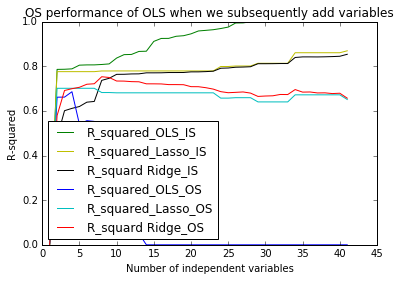

In [213]:
#OS OLS R2 deneding on the number of variables t

from sklearn import linear_model
import pylab

Number_variables=[]

OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

t=0
lambda_r_optimal = 40000
lambda_l_optimal = 40

##########################################################################################################
##########################################################################################################

for j in range(len(x_train.T)): #subsequently add variables
    
    t+=1
    Number_variables.append(t)

    #For OLS

    result=ols(y=y_train,x=pd.DataFrame(x_train.iloc[:,0:j+1]))
    temp=x_test.iloc[:,0:j+1]

    a=np.array(temp)
    b=np.array(result.beta)
    c=np.sum(a*b[0:-1],axis=1)+b[-1]

    error=y_test-c
    R_2=1-error.var()/y_test.var()
    if R_2>0:
        OLS_R_2_OS_F.append(R_2)
    else:
        OLS_R_2_OS_F.append(0)
    
    OLS_R_2_IS_F.append(result.r2)
    
    
     #For Ridge

    Ridge=linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal)
    Ridge.fit(x_train.iloc[:,0:j+1],y_train)
    
    # In the sample:
    p_IS=Ridge.predict(x_train.iloc[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    p_OS=Ridge.predict(x_test.iloc[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    
    if R_2_OS_Ridge>0:
        OLS_R_2_Ridge_OS_F.append(R_2_OS_Ridge)
    else:
        OLS_R_2_Ridge_OS_F.append(0)
      
    #For Lasso
    Lasso=linear_model.Lasso(fit_intercept=True, alpha=lambda_l_optimal)
    Lasso.fit(x_train.iloc[:,0:j+1],y_train)
    
    #In the sample:
    p_IS=Lasso.predict(x_train.iloc[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS)
  
 ###########################################################################    

    #Out of sample
    p_OS=Lasso.predict(x_test.iloc[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS=1-np.var(err_OS)/np.var(y_test)
    if R_2_OS>0:
        OLS_R_2_Lasso_OS_F.append(R_2_OS)
    else:
        OLS_R_2_Lasso_OS_F.append(0)
        
pylab.title('OS performance of OLS when we subsequently add variables')
pylab.plot(Number_variables,OLS_R_2_IS_F,'g',label='R_squared_OLS_IS')
pylab.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='R_squared_Lasso_IS')
pylab.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='R_squard Ridge_IS')

pylab.plot(Number_variables,OLS_R_2_OS_F,'b',label='R_squared_OLS_OS')
pylab.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='R_squared_Lasso_OS')
pylab.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='R_squard Ridge_OS')

pylab.legend(loc='lower right')
pylab.xlabel('Number of independent variables')
pylab.ylabel('R-squared')
pylab.legend(loc='lower left')
pylab.show()        
    

# Extracredit (25% of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 60% training and 40% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression: for each $\lambda$ of the considered sequence compute an average validation R2 for the 10 splits considered and finally select the $\lambda$ having the highest value for this average R2. Visualize the dependence of the said average cross-validation R2 over $\lambda$ for Lasso and Ridge. Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$.

## ANSWER

